# Deep Learning-I
## 11/19/2024

<a href="?print-pdf">print view</a>

<a href="./Lecture21-DeepLearning-I.ipynb">notebook</a>

# Project presentations

##  Present a biology/medicine themed paper that incorporates 'substantial' python implementation. 

### Dates: December 5 and December 10

**Papers can be from diverse areas of computational biology and medicine including but not limited to: systems biology, bioinformatics, computational structural biology, computational medicine, bioimaging, etc.**

**Details** 
1. You can work in groups of no more than 3 people.
2. All three group members will be required to present.
3. The presentation should be 12 mins + 3 mins questions.
4. The presentation should include:
    - What the paper is about.
    - A clear description of the python based coding done in the paper (including any packages you found interesting).
    - How that work helped the authors achieve the results they presented in the paper

# Perceptron

<center><img src="../files/perceptron.png" width="400"></center>

$$output = \begin{cases} 0 \text{ if } w\cdot x + b \le 0 \\ 1 \text{ if } w\cdot x + b > 0 \end{cases}$$

# Perceptron

Consider the following perceptron:

<center><img src="../files/example.png" width="300"></center>

If $x$ takes on only binary values, what are the possible outputs?


### **question**: "What are the corresponding outputs for x = [0,0],[0,1],[1,0], and [1,1]?",
- 0,0,0,0,
- 0,1,1,0
- 0,0,0,1
- 0,1,1,1
- 1,1,1,0

    


# Neurons

<img src="../files/example.png" width="300"></center>

Instead of a *binary* output, we set the output to the result of an **activation function** $\sigma$

$$output = \sigma(w\cdot x + b)$$

# Activation Functions: Step (Perceptron)

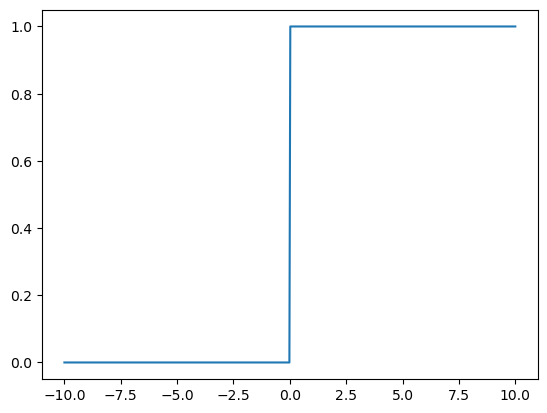

In [51]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,10,500)
plt.plot(x,np.heaviside(x,0))
plt.show()

# Activation Functions: Sigmoid (Logistic)

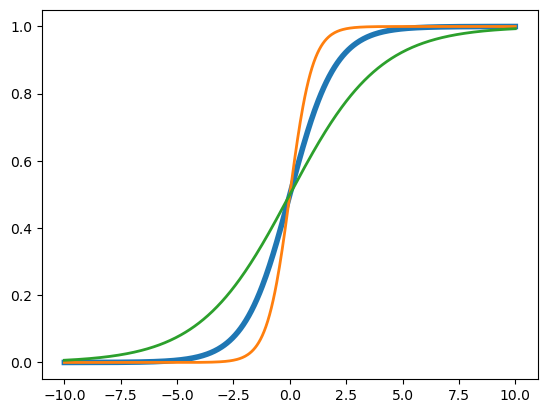

In [10]:
plt.plot(x, 1/(1+np.exp(-x)),linewidth=4);
plt.plot(x, 1/(1+np.exp(-2*x)),linewidth=2);
plt.plot(x, 1/(1+np.exp(-.5*x)),linewidth=2);
plt.show()

# Activation Functions: tanh

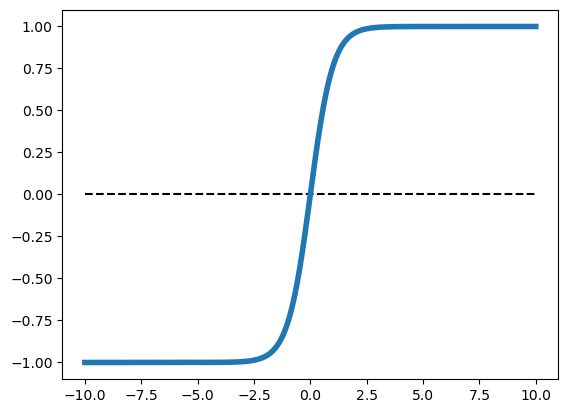

In [13]:
plt.plot([-10,10],[0,0],'k--')
plt.plot(x, np.tanh(x),linewidth=4);
plt.show()

# Activation Functions: ReLU
Rectified Linear Unit: $\sigma(z) = \max(0,z)$

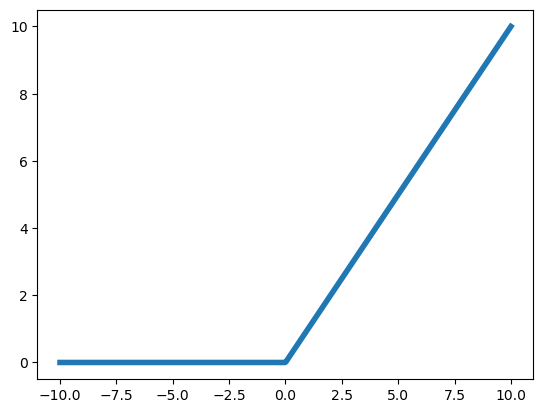

In [16]:
plt.plot(x,x*(x > 0),linewidth=4);
plt.show()

# Networks

<img src="../files/networks.png">

Terminology alert: networks of neurons are sometimes called *multilayer perceptrons*, despite not using the step function.

### **question**: "A network has 10 input nodes, two hidden layers each with 10 neurons, and 10 output neurons.  How many parameters does training have to estimate?",
- 30
- 100
- 300
- 330
- 600

# Networks

<img src="../files/dl0.png" style="float:right"> The number of input neurons corresponds to the number of features.

The number of output neurons corresponds to the number of label classes.  For binary classification, it is common to have two output nodes.

Layers are typically *fully connected*.

# Neural Networks

The <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">universal approximation theorem</a> says that, if some reasonable assumptions are made, a feedforward neural network with a finite number of nodes can approximate any continuous function to within a given error $\epsilon$ over a bounded input domain.

The theorem says nothing about the design (number of nodes/layers) of such a network.

The theorem says nothing about the *learnability* of the weights of such a network.

These are open theoretical questions.

Given a network design, how are we going to learn weights for the neurons?

# Stochastic Gradient Descent
<img src="../files//valley_with_ball.png" width="300" style="float:right">

Randomly select $m$ training examples $X_j$ and compute the gradient of the loss function ($L$).  Update weights and biases with a given _learning rate_  $\eta$.
$$ w_k' = w_k-\frac{\eta}{m}\sum_j^m 
\frac{\partial L_{X_j}}{\partial w_k}$$
$$b_l' = b_l-\frac{\eta}{m}
  \sum_j^m \frac{\partial L_{X_j}}{\partial b_l}
$$

Common loss functions: logistic, hinge, cross entropy, euclidean

# Loss Functions

<center><img src="./files/lossfuncs.png"></center>

x = 1 is a correct prediction, x = -1 a wrong prediction

# Backpropagation

Backpropagation is an efficient algorithm for computing the partial derivatives needed by the gradient descent update rule.  For a training example $x$ and loss function $L$ in a network with $N$ layers:

1. **Feedforward**.  For each layer $l$ compute
 $$a^{l} = \sigma(z^{l})$$
 where $z$ is the weighted input and $a$ is the activation induced by $x$ (these are vectors representing all nodes of layer $l$).
 
2. **Compute output error**
$$\delta^{N} = \nabla_a L \odot \sigma'(z^N)$$
where $ \nabla_a L_j = \partial L / \partial a^N_j$, the gradient of the loss with respect to the output activations. $\odot$ is the elementwise product.

3. **Backpropagate the error**
$$\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$$
  
4. **Calculate gradients**
$$\frac{\partial L}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j \text{ and } \frac{\partial L}{\partial b^l_j} = \delta^l_j$$

## Backpropagation as the Chain Rule

&nbsp;

$$\frac{\partial L}{\partial a^l} \cdot \frac{\partial a^l}{\partial z^l} \cdot \frac{\partial z^l}{\partial a^{l-1}} \cdot \frac{\partial a^{l-1}}{\partial z^{l-1}} \cdot \frac{\partial z^{l-1}}{\partial a^{l-2}} \cdots \frac{\partial a^{1}}{\partial z^{l}} \cdot \frac{\partial z^{l}}{\partial x}  $$

# Deep Learning

<center><img src="../files/dl1.png"></center>

A deep network is not more powerful (recall can approximate any function with a single layer), but may be more concise - can approximate some functions with many fewer nodes.

# Convolutional Neural Nets

<center><img src="../files/nnperformance.png"></center>

# Convolution Filters

A filter applies a *convolution kernel* to an image.  

The kernel is represented by an $n$x$n$ matrix where the target pixel is in the center.  

The output of the filter is the sum of the products of the matrix elements with the corresponding pixels.

Examples from [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)):

<table style="border: 0px solid black; text-align=center">
<tr><td><img src="https://upload.wikimedia.org/math/7/a/d/7ad9f1c26f76bc1ee55fdf0ef8c6197a.png"></td>
<td>
<img src="https://upload.wikimedia.org/math/3/0/c/30c42f667a353a5f0fbe92b0c4f2eee1.png">
</td>
<td>
<img src="https://upload.wikimedia.org/math/7/d/d/7ddb57480ef9fa57e2d1c2b3ffecb291.png">
</td>
</tr>
<tr><td>Identity</td><td>Blur</td><td>Edge Detection</td>
</table>

# Feature Maps

We can think of a kernel as identifying a *feature* in an image and the resulting image as a feature map that has high values (white) where the feature is present and low values (black) elsewhere.

*Feature maps retain the **spatial relationship** between features present in the original image.*


# Convolutional Layers

<img src="../files/conv.png" width="400" style="float:right"> A single kernel is applied across the input.  For each output feature map there is a single set of weights.

# Convolutional Layers

For images, each pixel is an input feature.  Each hidden layer is a set of feature maps.

<center><img src="../files/convLayers.png"></center>

# Pooling

Pooling layers apply a fixed convolution (usually the non-linear MAX kernel).  The kernel is usually applied with a *stride* to reduce the size of the layer.
 * faster to train
 * fewer parameters to fit
 * less sensitive to small changes (MAX)
<center><img src="../files/pooling.png"></center>

Consider an input image with 100 pixels.  In a classic neural network, we hook these pixels up to a hidden layer with 10 nodes.  In a CNN, we hook these pixels up to a convolutional layer with a 3x3 kernel and 10 output feature maps.

### Question: "Which network has more parameters to learn?",
- Classic
- CNN